# Iqtree tree

In [46]:
import pandas as pd
import numpy as np

# Intersection HyPhy and GERP results

## Filter the purifying selection sites

In [47]:
# Uploading the output of the Hyphy pipeline.
hyphy=pd.read_csv("/home/thibauld/Documents/Bioinformatics/Hyphy/csv_extracted_MEME/all_loci.csv")
# Rename column "sample" to "locus"
hyphy = hyphy.rename(columns={"sample": "Chromosome"})
hyphy

,Chromosome,codon,omega,alpha,beta-,p-,beta+,p+,LRT,p-value,q-value,branches_with_selection,LogL,AICc
0,ACmerged_contig_10026,1,1.936422,1.607794,0.261719,1.000000,3.113367,0.000000,0.000000,0.666667,0.897103,0,-22.893057,-22.893057
1,ACmerged_contig_10026,2,NaN,0.000000,0.000000,0.970693,52.397485,0.029307,2.771286,0.120517,0.897103,2,-19.598363,-18.723861
2,ACmerged_contig_10026,3,1.931410,1.574562,0.000000,1.000000,3.041125,0.000000,0.000000,0.666667,0.897103,0,-10.932309,-10.932309
3,ACmerged_contig_10026,4,49.600610,1.026870,0.000000,0.957254,50.933388,0.042746,2.553630,0.135285,0.897103,3,-33.347903,-32.079230
4,ACmerged_contig_10026,5,NaN,0.000000,0.000000,0.010000,0.216730,0.990000,0.012228,0.638016,0.897103,1,-10.382246,-10.381963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652686,Becon104Scf14253g0001.1,181,6409.749064,0.517884,0.444104,0.993281,3319.507251,0.006719,7.700837,0.009455,0.249886,2,-34.827106,-31.221895
652687,Becon104Scf14253g0001.1,182,NaN,0.000000,0.000000,0.988131,54.851172,0.011869,9.320394,0.004150,0.153558,1,-17.688916,-13.392790
652688,Becon104Scf14253g0001.1,183,46.104276,0.409888,0.159098,0.948421,18.897610,0.051579,4.647345,0.045232,0.836793,0,-34.260829,-32.016694
652689,Becon104Scf14253g0001.1,184,1.847486,0.898054,0.377918,1.000000,1.659142,0.000000,0.000000,0.666667,0.844749,0,-18.409945,-18.409945


In [48]:
# How many chro in the file?
hyphy['Chromosome'].nunique()

1237

In [49]:
# Make two columns for positions related to codon number.

# Add a nucleotide position for the codon
position_start = (hyphy['codon'] - 1) * 3 + 1 
position_end   = (hyphy['codon'] - 1) * 3 + 3 

# Add columns
hyphy['Start'] = position_start
hyphy['End'] = position_end

hyphy

,Chromosome,codon,omega,alpha,beta-,p-,beta+,p+,LRT,p-value,q-value,branches_with_selection,LogL,AICc,Start,End
0,ACmerged_contig_10026,1,1.936422,1.607794,0.261719,1.000000,3.113367,0.000000,0.000000,0.666667,0.897103,0,-22.893057,-22.893057,1,3
1,ACmerged_contig_10026,2,NaN,0.000000,0.000000,0.970693,52.397485,0.029307,2.771286,0.120517,0.897103,2,-19.598363,-18.723861,4,6
2,ACmerged_contig_10026,3,1.931410,1.574562,0.000000,1.000000,3.041125,0.000000,0.000000,0.666667,0.897103,0,-10.932309,-10.932309,7,9
3,ACmerged_contig_10026,4,49.600610,1.026870,0.000000,0.957254,50.933388,0.042746,2.553630,0.135285,0.897103,3,-33.347903,-32.079230,10,12
4,ACmerged_contig_10026,5,NaN,0.000000,0.000000,0.010000,0.216730,0.990000,0.012228,0.638016,0.897103,1,-10.382246,-10.381963,13,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652686,Becon104Scf14253g0001.1,181,6409.749064,0.517884,0.444104,0.993281,3319.507251,0.006719,7.700837,0.009455,0.249886,2,-34.827106,-31.221895,541,543
652687,Becon104Scf14253g0001.1,182,NaN,0.000000,0.000000,0.988131,54.851172,0.011869,9.320394,0.004150,0.153558,1,-17.688916,-13.392790,544,546
652688,Becon104Scf14253g0001.1,183,46.104276,0.409888,0.159098,0.948421,18.897610,0.051579,4.647345,0.045232,0.836793,0,-34.260829,-32.016694,547,549
652689,Becon104Scf14253g0001.1,184,1.847486,0.898054,0.377918,1.000000,1.659142,0.000000,0.000000,0.666667,0.844749,0,-18.409945,-18.409945,550,552


In [50]:
# Make the filter to retain only the purifying selection sites.

# Convert 'omega' column to numeric (force non-numeric to NaN)
hyphy['omega'] = pd.to_numeric(hyphy['omega'], errors='coerce')

# Convert 'p+' column to numeric as well
hyphy['p+'] = pd.to_numeric(hyphy['p+'], errors='coerce')

# Put in place filters on four values.
hyphy_filtered = hyphy[
    (hyphy['beta+'] == 0) &
    (hyphy['p-value'] == 1.0) &
    (hyphy['branches_with_selection'] == 0) &
    (pd.isna(hyphy['omega']))
]

hyphy_filtered

,Chromosome,codon,omega,alpha,beta-,p-,beta+,p+,LRT,p-value,q-value,branches_with_selection,LogL,AICc,Start,End
14,ACmerged_contig_10026,15,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0.0,0.0,43,45
18,ACmerged_contig_10026,19,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0.0,0.0,55,57
19,ACmerged_contig_10026,20,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0.0,0.0,58,60
28,ACmerged_contig_10026,29,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0.0,0.0,85,87
29,ACmerged_contig_10026,30,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0.0,0.0,88,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652670,Becon104Scf14253g0001.1,165,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0.0,0.0,493,495
652671,Becon104Scf14253g0001.1,166,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0.0,0.0,496,498
652672,Becon104Scf14253g0001.1,167,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0.0,0.0,499,501
652678,Becon104Scf14253g0001.1,173,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0.0,0.0,517,519


In [51]:
# Here the results are given by codon, let's convert it in range of nucleotids.

import pyranges as pr

# Create a Pyranges object from your DataFrame
gr = pr.PyRanges(hyphy_filtered[["Chromosome", "Start", "End"]])

# Merge adjacent intervals (slack=1 tells PyRanges to merge intervals if there's ≤1 bp gap between them.)
merged = gr.merge(slack=1)

# Convert back to DataFrame and rename columns
merged_df = merged.as_df()



In [52]:
# Input the correct dataframe name:

hyphy_range=merged_df

hyphy_range

,Chromosome,Start,End
0,ACmerged_contig_16,31,33
1,ACmerged_contig_16,43,45
2,ACmerged_contig_16,70,75
3,ACmerged_contig_16,100,111
4,ACmerged_contig_16,115,117
...,...,...,...
82588,Becon104Scf14253g0001.1,475,477
82589,Becon104Scf14253g0001.1,487,489
82590,Becon104Scf14253g0001.1,493,501
82591,Becon104Scf14253g0001.1,517,519


## Filter the GERP conserved sites

In [53]:
# Uploading the output of the Hyphy pipeline.

column_names=["chrom", "region", "pos_start", "pos_end", "RS-score","p-value", "not_length", "alpha", "beta" ]
# Read the file
gerp = pd.read_csv(
    "/home/thibauld/Documents/Bioinformatics/Deleterious_alleles_pipeline/Deleterious_alleles_PNG/GERP/GERP_PNG_iqtree/all.mfa.rates.elems",
    sep='\t',
    header=None,
    names=column_names
)
gerp

,chrom,region,pos_start,pos_end,RS-score,p-value,not_length,alpha,beta
0,ACmerged_contig_10026,region,1975,3125,2269.700,7.668250e-28,1150,0.0,0.0
1,ACmerged_contig_10026,region,3279,3684,841.284,9.915850e-17,1555,0.0,0.0
2,ACmerged_contig_10026,region,825,884,140.106,9.707290e-09,1614,0.0,0.0
3,ACmerged_contig_10026,region,494,698,398.796,7.295890e-06,1818,0.0,0.0
4,ACmerged_contig_10026,region,405,427,54.860,7.613560e-06,1840,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2421,Becon104Scf07591g0002.1,region,233,819,1184.280,2.038230e-67,586,0.0,0.0
2422,Becon104Scf07961g0002.1,region,415,644,275.238,2.599010e-11,229,0.0,0.0
2423,Becon104Scf07961g0002.1,region,148,167,46.054,9.909510e-06,248,0.1,3.6
2424,Becon104Scf09217g0008.1,region,94,1107,1689.280,7.493720e-66,1013,0.0,0.0


In [54]:
summary = gerp[["RS-score", "p-value"]].agg(["min", "max", "mean"])
print(summary)

         RS-score        p-value
min      9.720000  1.968940e-179
max   4170.190000   3.580140e-04
mean   686.723787   5.969213e-06


Looking at these RS scores — values like 2269, 2029, etc. — they represent the total RS score summed across all bases in the region.
These are not per-base RS scores, but summed RS scores over the element length.
If a 1000 bp region has ~2.2 RS score per base, you'll get ~2200 as the total.

The raw RS scores in this file (from the *.elems output of GERP++) are summed across the entire region, 
so longer regions naturally have higher RS scores, even if they're not more constrained per base. 
This makes direct comparison across regions of different sizes misleading.


Solution: Use RS Score per base (mean RS score)

To compare constrained regions fairly regardless of their length, compute the average RS score per base for each element:
Mean RS score per base=Total RS scoreLength of region (end - start + 1)
Mean RS score per base=Length of region (end - start + 1)Total RS score​

In [55]:
# Calculate region length
gerp["length"] = gerp["pos_end"] - gerp["pos_start"] + 1

# Calculate mean RS score per base
gerp["mean_RS_score"] = gerp["RS-score"] / gerp["length"]

In [56]:
gerp

,chrom,region,pos_start,pos_end,RS-score,p-value,not_length,alpha,beta,length,mean_RS_score
0,ACmerged_contig_10026,region,1975,3125,2269.700,7.668250e-28,1150,0.0,0.0,1151,1.971937
1,ACmerged_contig_10026,region,3279,3684,841.284,9.915850e-17,1555,0.0,0.0,406,2.072128
2,ACmerged_contig_10026,region,825,884,140.106,9.707290e-09,1614,0.0,0.0,60,2.335100
3,ACmerged_contig_10026,region,494,698,398.796,7.295890e-06,1818,0.0,0.0,205,1.945346
4,ACmerged_contig_10026,region,405,427,54.860,7.613560e-06,1840,0.0,0.0,23,2.385217
...,...,...,...,...,...,...,...,...,...,...,...
2421,Becon104Scf07591g0002.1,region,233,819,1184.280,2.038230e-67,586,0.0,0.0,587,2.017513
2422,Becon104Scf07961g0002.1,region,415,644,275.238,2.599010e-11,229,0.0,0.0,230,1.196687
2423,Becon104Scf07961g0002.1,region,148,167,46.054,9.909510e-06,248,0.1,3.6,20,2.302700
2424,Becon104Scf09217g0008.1,region,94,1107,1689.280,7.493720e-66,1013,0.0,0.0,1014,1.665957


In [57]:
summary = gerp[["mean_RS_score", "length", "p-value"]].agg(["min", "max", "mean"])
print(summary)

      mean_RS_score       length        p-value
min        0.368272     5.000000  1.968940e-179
max        3.082222  2001.000000   3.580140e-04
mean       1.808821   414.745672   5.969213e-06


In [58]:
# We select the regions with strong constrains (conserved exon) with RS score > 5.
gerp_filtered = gerp[gerp["mean_RS_score"] >= 2.6]


In [59]:
gerp_filtered.head()

,chrom,region,pos_start,pos_end,RS-score,p-value,not_length,alpha,beta,length,mean_RS_score
27,ACmerged_contig_1011,region,90,95,17.75,6.407820e-07,5,0.0,0.0,6,2.958333
86,ACmerged_contig_10585,region,1444,1452,24.05,3.329670e-06,813,0.1,1.8,9,2.672222
99,ACmerged_contig_1065,region,1188,1206,51.42,6.806890e-08,261,0.0,0.0,19,2.706316
236,ACmerged_contig_1190,region,213,224,31.46,2.165850e-07,11,0.0,0.0,12,2.621667
344,ACmerged_contig_1299,region,480,485,16.25,1.219600e-06,63,0.0,0.0,6,2.708333


In [60]:
len(gerp_filtered)

56

In [61]:
# For PyRange
# Rename columns for merging:
gerp_range=gerp_filtered[["chrom", "pos_start", "pos_end"]].rename(
    columns={"chrom":"Chromosome", "pos_start": "Start", "pos_end": "End"}
)
gerp_range

,Chromosome,Start,End
27,ACmerged_contig_1011,90,95
86,ACmerged_contig_10585,1444,1452
99,ACmerged_contig_1065,1188,1206
236,ACmerged_contig_1190,213,224
344,ACmerged_contig_1299,480,485
406,ACmerged_contig_13889,804,815
506,ACmerged_contig_1474,54,59
507,ACmerged_contig_1474,75,80
531,ACmerged_contig_15185,1202,1208
636,ACmerged_contig_16376,1459,1469


## Include Chomosomes size

In [62]:
# First we import the length of the chromosomes, calculated from the fasta file
import pandas as pd

# Adjust the path if needed
csv_path = "/home/thibauld/Documents/Bioinformatics/Deleterious_alleles_pipeline/Deleterious_alleles_github/baits_sequences/baits_coordinates.csv"

# Read the CSV
baits = pd.read_csv(csv_path)

# Clean baits Chromosome name to match hyphy and gerp
baits_clean = baits.copy()
baits_clean["Chromosome"] = baits_clean["Chromosome"].str.replace("Hannah_Begonia_baits-", "", regex=False)

# Display the first few rows
baits_clean.head()


,Chromosome,Start,End
0,ACmerged_contig_1002,1,811
1,ACmerged_contig_10026,1,4034
2,ACmerged_contig_10030,1,1862
3,ACmerged_contig_10035,1,1386
4,ACmerged_contig_10054,1,2073


In [63]:
# Rename for merging

baits_range=baits_clean
baits_range

,Chromosome,Start,End
0,ACmerged_contig_1002,1,811
1,ACmerged_contig_10026,1,4034
2,ACmerged_contig_10030,1,1862
3,ACmerged_contig_10035,1,1386
4,ACmerged_contig_10054,1,2073
...,...,...,...
1234,Becon104Scf02747g0032.1,1,1347
1235,Becon104Scf00004g0014.1,1,219
1236,Becon104Scf01446g0053.1,1,1605
1237,Becon104Scf03109g0024.1,1,874


## Make the intersection

### Using PyRanges

### Prepare GERP and hyphy for intersection

## Intersection

In [64]:
# Prepare the dataframes for PyRange use:
baits_rg=baits_range.sort_values(["Chromosome", "Start", "End"]).reset_index(drop=True)
gerp_rg=gerp_range.sort_values(["Chromosome", "Start", "End"]).reset_index(drop=True)
hyphy_rg=hyphy_range.sort_values(["Chromosome", "Start", "End"]).reset_index(drop=True)

In [65]:
# Convert in PyRanges objects
baits_pr = pr.PyRanges(baits_range)
gerp_pr = pr.PyRanges(gerp_range)
hyphy_pr = pr.PyRanges(hyphy_range)

In [66]:
import pyranges as pr

# Assuming you have three PyRanges objects: baits_pr, gerp_pr, hyphy_pr

# Intersect gr1 and gr2
#intermediate = baits_pr.intersect(gerp_pr)

# Intersect the result with gr3 to get the triple-overlap
#triple_overlap = intermediate.intersect(hyhy_pr)
#overlap_pr = triple_overlap

overlap_pr = baits_pr.intersect(gerp_pr).intersect(hyphy_pr) 

overlap_pr

,Chromosome,Start,End
0,ACmerged_contig_1011,91,93
1,ACmerged_contig_1065,1189,1194
2,ACmerged_contig_1065,1198,1206
3,ACmerged_contig_1190,217,224
4,ACmerged_contig_1474,55,57
5,ACmerged_contig_1474,76,78
6,ACmerged_contig_1641,1741,1742
7,ACmerged_contig_1641,1810,1812
8,ACmerged_contig_1948,1744,1749
9,ACmerged_contig_1948,1753,1754


In [67]:
# Save as BED
overlap_pr.to_bed("intersection_GERP_HyPhy.bed")

# Save as CSV (via Pandas)
overlap_pr.df.to_csv("intersection_GERP_HyPhy.csv", index=False)

# Plotting

In [68]:
import pandas as pd

# Convert PyRanges to DataFrames
baits_df = baits_pr.df
gerp_df = gerp_pr.df
hyphy_df = hyphy_pr.df
overlap_df = overlap_pr.df

# Add a 'Type' column to each DataFrame
baits_df['Type'] = 'Bait'
gerp_df['Type'] = 'GERP'
hyphy_df['Type'] = 'HyPhy'
overlap_df['Type'] = 'Overlap'

# Combine all DataFrames (use the DataFrame versions, not PyRanges)
all_data = pd.concat([baits_df, gerp_df, hyphy_df, overlap_df])

# Verify
all_data.head()

,Chromosome,Start,End,Type
0,ACmerged_contig_16,1,1824,Bait
1,ACmerged_contig_20,1,1465,Bait
2,ACmerged_contig_52,1,1040,Bait
3,ACmerged_contig_66,1,2875,Bait
4,ACmerged_contig_86,1,3211,Bait


In [69]:
# Subset all_data to try plotting
# Plot only chr1 and chr2
subset_data = all_data[all_data['Chromosome'].isin(['ACmerged_contig_31289','ACmerged_contig_24516','ACmerged_contig_16', 'ACmerged_contig_20', 'ACmerged_contig_797', 'ACmerged_contig_806', 'ACmerged_contig_1011', 'ACmerged_contig_1065'])]


In [70]:
# 1. filter chromosomes based on relevant data

# Get chromosomes that have at least one GERP, HyPhy, or Overlap region
relevant_chroms = all_data[
    all_data['Type'].isin(['GERP', 'HyPhy', 'Overlap'])
]['Chromosome'].unique()

# Filter common_chroms to keep only relevant ones
common_chroms = sorted(relevant_chroms)

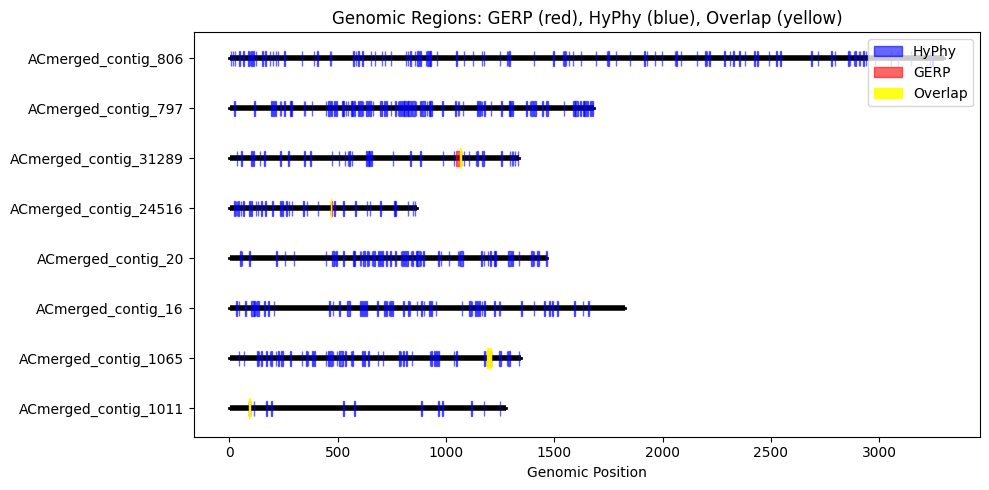

In [71]:
# 2. Plot script

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# --- Step 1: Filter chromosomes ---
relevant_chroms = subset_data[
    subset_data['Type'].isin(['GERP', 'HyPhy', 'Overlap'])
]['Chromosome'].unique()
common_chroms = sorted(relevant_chroms)

# --- Step 2: Initialize plot ---
fig, ax = plt.subplots(figsize=(10, len(common_chroms) * 0.5 + 1))  # Adjust height dynamically

# --- Step 3: Plot each chromosome ---
for i, chrom in enumerate(common_chroms):
    # Get chromosome length (from Bait regions if available, otherwise max position)
    chrom_bait = subset_data[(subset_data['Chromosome'] == chrom) & (subset_data['Type'] == 'Bait')]
    if not chrom_bait.empty:
        chrom_length = chrom_bait['End'].max()
    else:
        chrom_length = subset_data[subset_data['Chromosome'] == chrom]['End'].max()
    
    y = i  # y-position for current chromosome

    # Draw chromosome baseline (black line)
    ax.plot([0, chrom_length], [y, y], color='black', lw=2, zorder=1)

    # Draw BAIT regions (thick black line, if they exist)
    bait_regions = subset_data[(subset_data['Chromosome'] == chrom) & (subset_data['Type'] == 'Bait')]
    for _, row in bait_regions.iterrows():
        ax.plot([row['Start'], row['End']], [y, y], color='black', lw=4, solid_capstyle='butt', zorder=2)

    # Draw HyPhy regions (blue)
    hyphy_regions = subset_data[(subset_data['Chromosome'] == chrom) & (subset_data['Type'] == 'HyPhy')]
    for _, row in hyphy_regions.iterrows():
        ax.add_patch(patches.Rectangle(
            (row['Start'], y - 0.15),
            row['End'] - row['Start'],
            0.3,
            color='blue',
            alpha=0.6,
            zorder=3,
            label='HyPhy' if (i == 0 and _ == hyphy_regions.index[0]) else None
        ))

    # Draw GERP regions (red)
    gerp_regions = subset_data[(subset_data['Chromosome'] == chrom) & (subset_data['Type'] == 'GERP')]
    for _, row in gerp_regions.iterrows():
        ax.add_patch(patches.Rectangle(
            (row['Start'], y - 0.15),
            row['End'] - row['Start'],
            0.3,
            color='red',
            alpha=0.6,
            zorder=4,
            label='GERP' if (i == 0 and _ == gerp_regions.index[0]) else None
        ))

    # Draw OVERLAP regions (yellow, on top)
    overlap_regions = subset_data[(subset_data['Chromosome'] == chrom) & (subset_data['Type'] == 'Overlap')]
    for _, row in overlap_regions.iterrows():
        ax.add_patch(patches.Rectangle(
            (row['Start'], y - 0.2),
            row['End'] - row['Start'],
            0.4,
            color='yellow',
            alpha=0.9,
            zorder=5,
            label='Overlap' if (i == 0 and _ == overlap_regions.index[0]) else None
        ))

# --- Step 4: Format plot ---
ax.set_yticks(range(len(common_chroms)))
ax.set_yticklabels(common_chroms)
ax.set_xlabel("Genomic Position")
ax.set_title("Genomic Regions: GERP (red), HyPhy (blue), Overlap (yellow)")

# Legend without duplicates
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right')

plt.tight_layout()
plt.savefig("Genomic_Regions_subset.png", dpi=300, bbox_inches='tight')
plt.show()


# Display only chromosomes with overlap

In [72]:
over_data=all_data[all_data["Type"]=="Overlap"]
list_chr=over_data["Chromosome"].unique()
int_subset_data = all_data[all_data['Chromosome'].isin(list_chr)]
int_subset_data

,Chromosome,Start,End,Type
40,ACmerged_contig_1011,1,1277,Bait
44,ACmerged_contig_1065,1,1344,Bait
52,ACmerged_contig_1190,1,4682,Bait
67,ACmerged_contig_1474,1,1007,Bait
77,ACmerged_contig_1641,1,2159,Bait
...,...,...,...,...
48,ACmerged_contig_24088,28,33,Overlap
49,ACmerged_contig_24516,469,471,Overlap
50,ACmerged_contig_25968,373,378,Overlap
51,ACmerged_contig_31289,1063,1067,Overlap


In [73]:
# Number of chromosomes with intersection?
int_subset_data["Chromosome"].nunique()

41

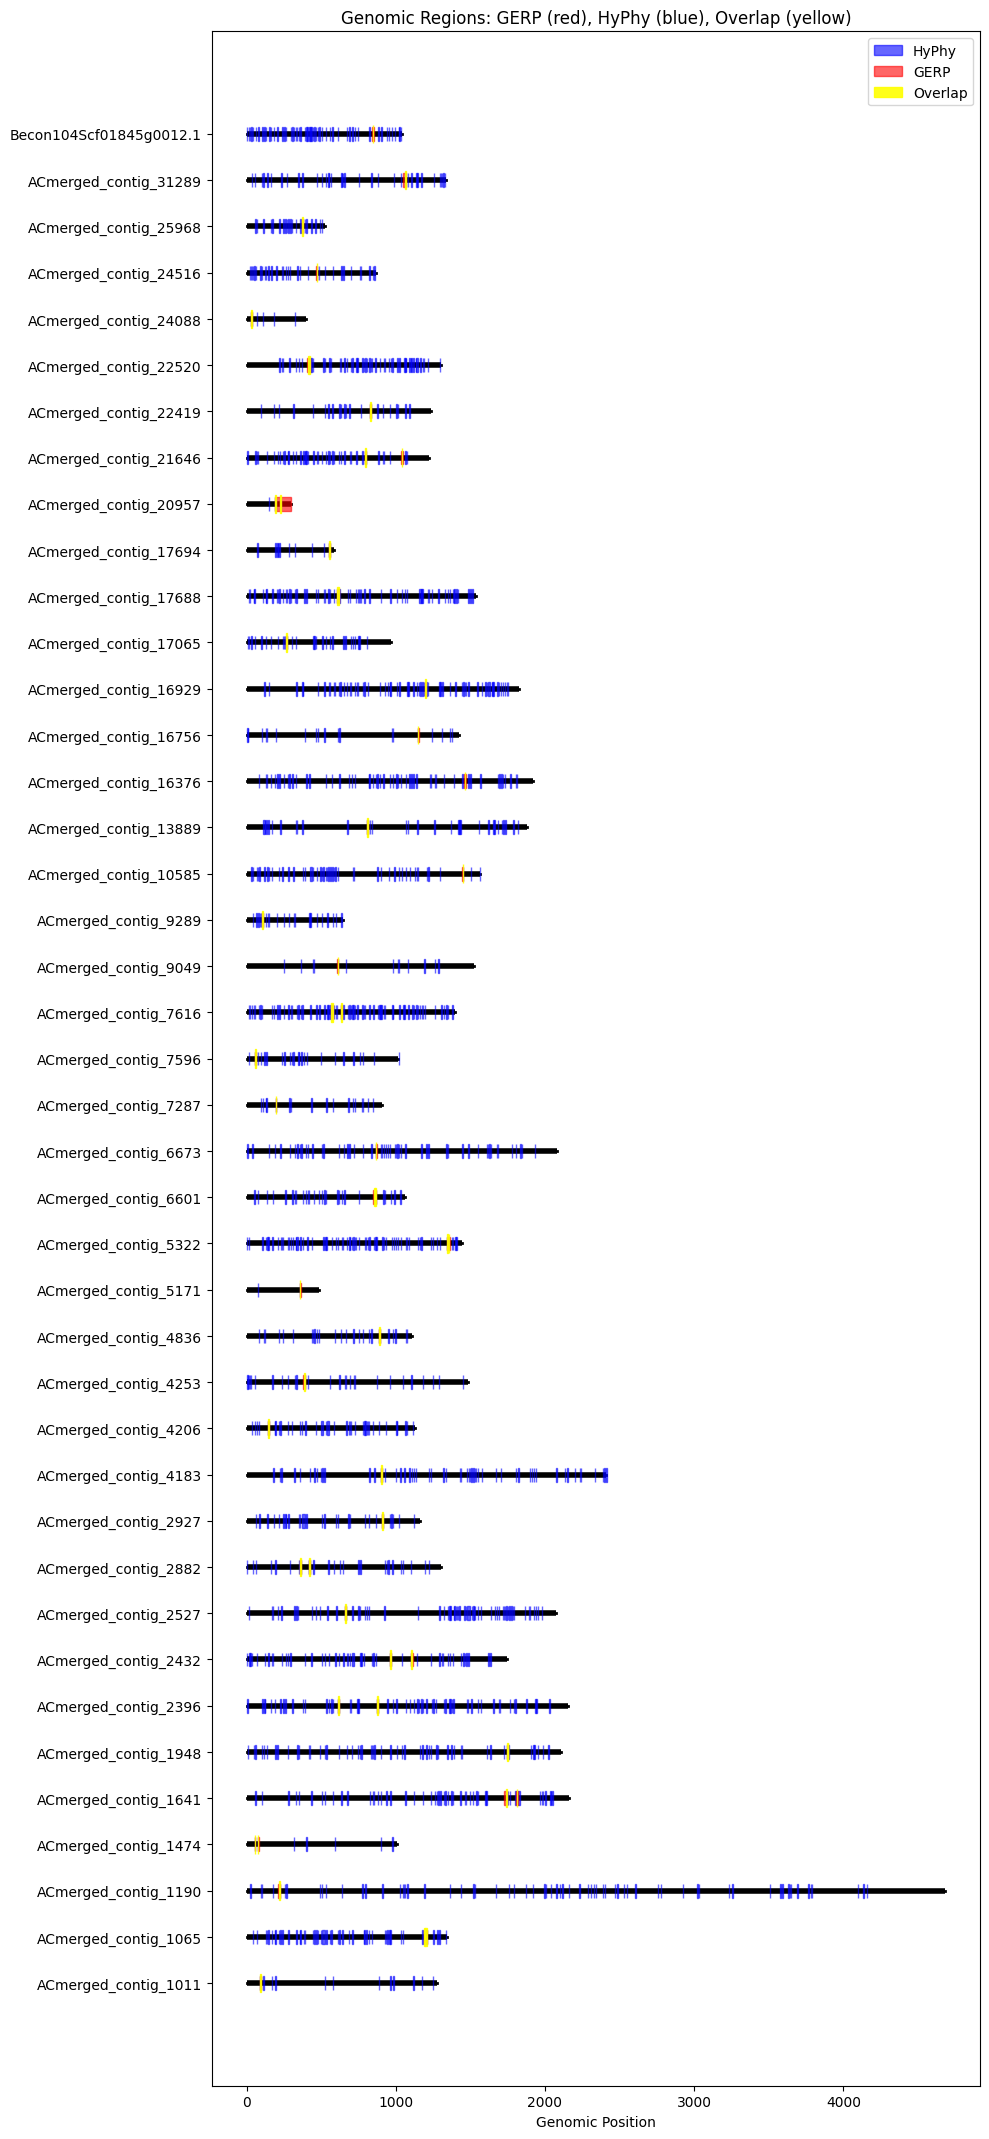

In [76]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# --- Step 1: Filter chromosomes ---
relevant_chroms = int_subset_data[
    int_subset_data['Type'].isin(['GERP', 'HyPhy', 'Overlap'])
]['Chromosome'].unique()
#common_chroms = sorted(relevant_chroms)
import re

def natural_key(s):
    # Split into digit and non-digit chunks
    parts = re.split(r'(\d+)', str(s))
    return [int(p) if p.isdigit() else p for p in parts]

common_chroms = sorted(relevant_chroms, key=natural_key)

# --- Step 2: Initialize plot ---
fig, ax = plt.subplots(figsize=(10, len(common_chroms) * 0.5 + 1))  # Adjust height dynamically

# --- Step 3: Plot each chromosome ---
for i, chrom in enumerate(common_chroms):
    # Get chromosome length (from Bait regions if available, otherwise max position)
    chrom_bait = int_subset_data[(int_subset_data['Chromosome'] == chrom) & (int_subset_data['Type'] == 'Bait')]
    if not chrom_bait.empty:
        chrom_length = chrom_bait['End'].max()
    else:
        chrom_length = int_subset_data[int_subset_data['Chromosome'] == chrom]['End'].max()
    
    y = i  # y-position for current chromosome

    # Draw chromosome baseline (black line)
    ax.plot([0, chrom_length], [y, y], color='black', lw=2, zorder=1)

    # Draw BAIT regions (thick black line, if they exist)
    bait_regions = int_subset_data[(int_subset_data['Chromosome'] == chrom) & (int_subset_data['Type'] == 'Bait')]
    for _, row in bait_regions.iterrows():
        ax.plot([row['Start'], row['End']], [y, y], color='black', lw=4, solid_capstyle='butt', zorder=2)

    # Draw HyPhy regions (blue)
    hyphy_regions = int_subset_data[(int_subset_data['Chromosome'] == chrom) & (int_subset_data['Type'] == 'HyPhy')]
    for _, row in hyphy_regions.iterrows():
        ax.add_patch(patches.Rectangle(
            (row['Start'], y - 0.15),
            row['End'] - row['Start'],
            0.3,
            color='blue',
            alpha=0.6,
            zorder=3,
            label='HyPhy' if (i == 0 and _ == hyphy_regions.index[0]) else None
        ))

    # Draw GERP regions (red)
    gerp_regions = int_subset_data[(int_subset_data['Chromosome'] == chrom) & (int_subset_data['Type'] == 'GERP')]
    for _, row in gerp_regions.iterrows():
        ax.add_patch(patches.Rectangle(
            (row['Start'], y - 0.15),
            row['End'] - row['Start'],
            0.3,
            color='red',
            alpha=0.6,
            zorder=4,
            label='GERP' if (i == 0 and _ == gerp_regions.index[0]) else None
        ))

    # Draw OVERLAP regions (yellow, on top)
    overlap_regions = int_subset_data[(int_subset_data['Chromosome'] == chrom) & (int_subset_data['Type'] == 'Overlap')]
    for _, row in overlap_regions.iterrows():
        ax.add_patch(patches.Rectangle(
            (row['Start'], y - 0.2),
            row['End'] - row['Start'],
            0.4,
            color='yellow',
            alpha=0.9,
            zorder=5,
            label='Overlap' if (i == 0 and _ == overlap_regions.index[0]) else None
        ))

# --- Step 4: Format plot ---
ax.set_yticks(range(len(common_chroms)))
ax.set_yticklabels(common_chroms)
ax.set_xlabel("Genomic Position")
ax.set_title("Genomic Regions: GERP (red), HyPhy (blue), Overlap (yellow)")

# Legend without duplicates
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right')

plt.tight_layout()
plt.savefig("Genomic_Regions_all_intersections.png", dpi=300, bbox_inches='tight')
plt.show()

